# PISA 2012: Learning success and environmental variables -
# digital learning infrastructure and performance in scientific work
## by Krunoslav Miskovic



## Introduction

- The PISA survey looks at how well prepared they are for life beyond school. 
- A huge number of students (~500.000) in 65 countries participated in these tests of reading, mathematics and science. 
- To examine these fields of expertise I'm going to use three variables, that stand for these fields of expertise and some categorical and numerical environmental variables. 
- My motivation is to analyze the relation between the success in reading, mathematics and science and environmental variables like digital infrastructure. 
- In this presentation I'm going to focus the visualizations on the SCIE performance indicator and the digital learning environment.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df_master = pd.read_csv('pisa2012new.csv',encoding='latin-1')
list_columns = ['dig_learn_infra', 'learn_infra', 'read_learn_infra', 'COUNTRY', 'MOM_HOM', 'DAD_HOM', 'SCIE', 'DESK', 'ROOM', 'PLACE', 'CPU', 'SW', 'NET', 'READ', 'MATH', 'PARED', 'HOMEPOS', 'WEALTH', 'LIT', 'POET', 'TEXT']
for i in df_master.columns:
    if i not in list_columns:
        df_master.drop(i, axis=1, inplace = True)

### Description of dataset

- The original dataset is strucutred as a table with 636 columns and almost 500.000 rows. 
- As stated above I'm interested in environmental variables and how they relate to the performance of math, reading and scientific work. 
- These are the columns that can help me to investigate the influence of environmental variables on learning succcess:

- NC        Country
- PV1READ   Performance indicator reading
- PV1MATH   Performance indicator math
- PV1SCIE   Performance indicator science
- ST11Q01 	At Home - Mother
- ST11Q02 	At Home - Father
- ST26Q01 	Possessions - desk
- ST26Q02 	Possessions - own room
- ST26Q03 	Possessions - study place
- ST26Q04 	Possessions - computer
- ST26Q05 	Possessions - software
- ST26Q06 	Possessions - Internet
- ST26Q07   Possessions - Literature
- ST26Q08   Possessions - Poetry
- ST26Q10   Possessions - Textbook
- PARED 	Highest parental education in years
- HOMEPOS
- WEALTH

## Examples for the distribution of the Data

In this part of the work I'm going to check the distribution of the values. 

### Numerical variable SCIE

For the numerical variables I will use a histogram to visualize the data.

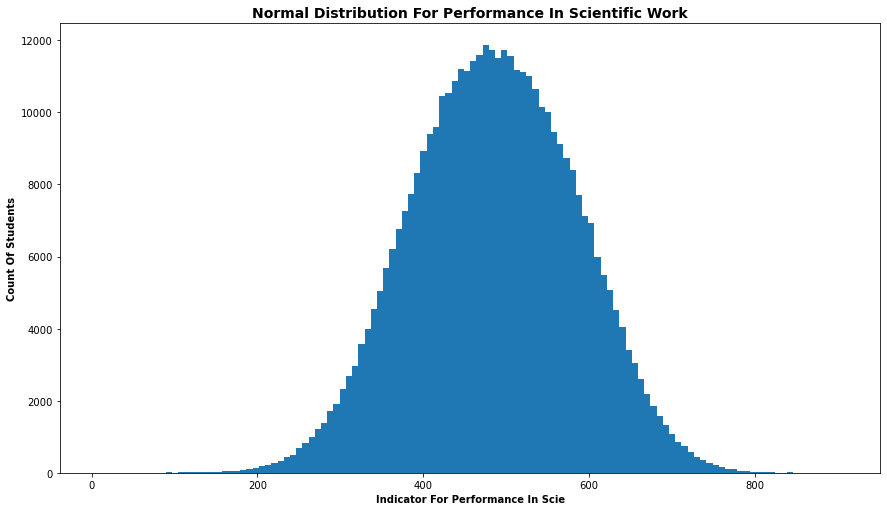

In [3]:
plt.figure(figsize=[14.70, 8.27])
bin_edges = np.arange(df_master['SCIE'].min(), df_master['SCIE'].max()+7.5, 7.5)
sns.distplot(df_master['SCIE'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1})
plt.ylabel('Count of students'.title(), fontsize = 10, weight = "bold")
plt.xlabel('Indicator for performance in SCIE'.title(), fontsize = 10, weight = "bold")
plt.title('Normal distribution for performance in scientific work'.title(), fontsize = 14, weight = "bold")
plt.show();

The three field of expertise variables "MATH", "READ" and "SCIE" and the variables for the economic situation "WEALTH" and "HOMEPOS" have a normal distribution.

### Categorical variables

In the next step I'm going to take a look at a example for the distribution of the categorical variable Computer.

In [4]:
x = df_master['CPU'].value_counts()/len(df_master)
y = 1 - x
label = ['Computer', 'No Computer']
pie_values = [x, y]

In [5]:
pie_values

[CPU    0.872544
 Name: CPU, dtype: float64,
 CPU    0.127456
 Name: CPU, dtype: float64]

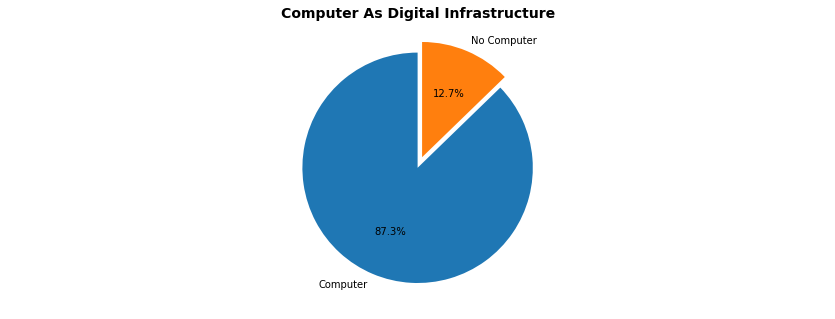

In [6]:
#pieplot(df_master,'CPU')
fig1, ax1 = plt.subplots()
fig1.subplots_adjust(0.1,0,2,1)
ax1.axis('equal') 
base_color = sns.color_palette()[0]
ax1.pie(pie_values, explode = (0, 0.1), labels = label, autopct='%1.1f%%', startangle=90)
plt.title('Computer as digital infrastructure'.title(), fontsize = 14, weight = "bold")
#plt.tight_layout()
plt.show();

- Most of the students have a computer. The distribution of the categorical variables does not show any remarkable abormalities from my point of view. 
- The distribution of the other columns is as expected.

## Creating new environmental variables

Now I'll comprehend the categorical variables to three new variables digital learning infrastructure, reading learning infrastrucutre and general learning infrastructure. The digital learning infrastructure serves as example.

In [7]:
base_color = sns.color_palette()[0]
def countplot (df,column):
    plt.figure(figsize=[14.70, 8.27])
    plt.title('Distribution of learning infrastructure'.title(), fontsize = 14, weight = "bold")
    sns.countplot(df[column], color=base_color);
    plt.ylabel('Count of students'.title(), fontsize = 10, weight = "bold")
    plt.xlabel('Learning infrastructure'.title(), fontsize = 10, weight = "bold")
    plt.title('Distribution of learning infrastructure'.title(), fontsize = 14, weight = "bold")
    # add annotations
    n_points = df.shape[0]
    cat_counts = df[column].value_counts()
    locs, labels = plt.xticks() # get the current tick locations and labels
    
    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, count, pct_string, ha = 'center', color = 'black')


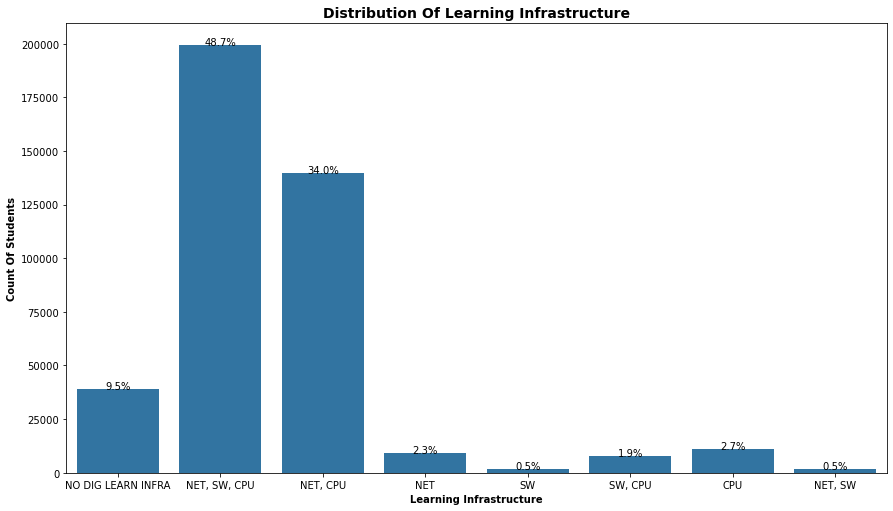

In [8]:
countplot(df_master, 'dig_learn_infra')

- Almost half of the students have a computer, software and internet followed by those with a computer and internet with 34%. 
- But also almost ten percent have no digital infrastructure at all.

## Relation of digital learning infrastructure to general learning infrastructure illustrated by countplot

After looking at the countplot for digital infrastructure, the dig_learn_infra countplot will be refined by the general learn infrastructure (learn_infra).

In [9]:
def hue_countplt(df, column1, column2):
    plt.figure(figsize=[14.70, 8.27])
    plt.title(column1 + ' and ' + column2, fontsize = 14, weight = "bold")
    sns.countplot(data = df, x = column1, hue = column2);
    plt.ylabel('Count of students'.title(), fontsize = 10, weight = "bold")
    plt.xlabel('Learning infrastructure'.title(), fontsize = 10, weight = "bold")
    n_points = df.shape[0]
    cat_counts = df[column1].value_counts()
    cat_pos = df.groupby(column2)[column1].value_counts().to_frame().unstack(level=0).max(axis=1)
    locs, labels = plt.xticks() # get the current tick locations and labels

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = cat_counts[label.get_text()]
        pos = cat_pos[label.get_text()]
        pct_string = '{:0.1f}%'.format(100*count/n_points)

        # print the annotation just below the top of the bar
        plt.text(loc, pos, pct_string, ha = 'center', va='bottom', color = 'black')


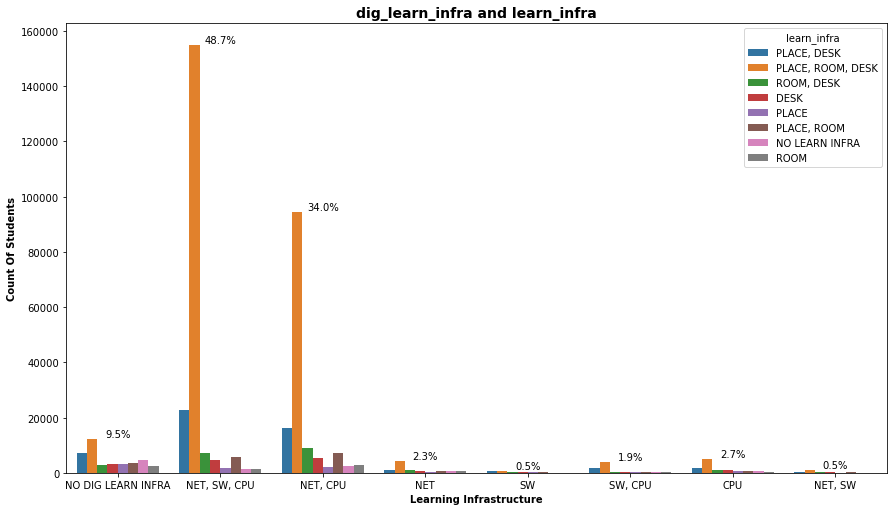

In [10]:
hue_countplt(df_master, 'dig_learn_infra', 'learn_infra')

- In this plot it can be clearly seen that the number of those students with all digital and general equipment are represented by the biggest bar with more than 150.000. 
- After that follows the category with Internet and computer. 

## Violinplots for the relation of digital learning infrastructure with performance indicator for science

After showing the connection between general and dig and read lerning infratructure, I will illustrate how they relate to the performance in the different fields of expertise. The illustratons are violin and boxplot charts.

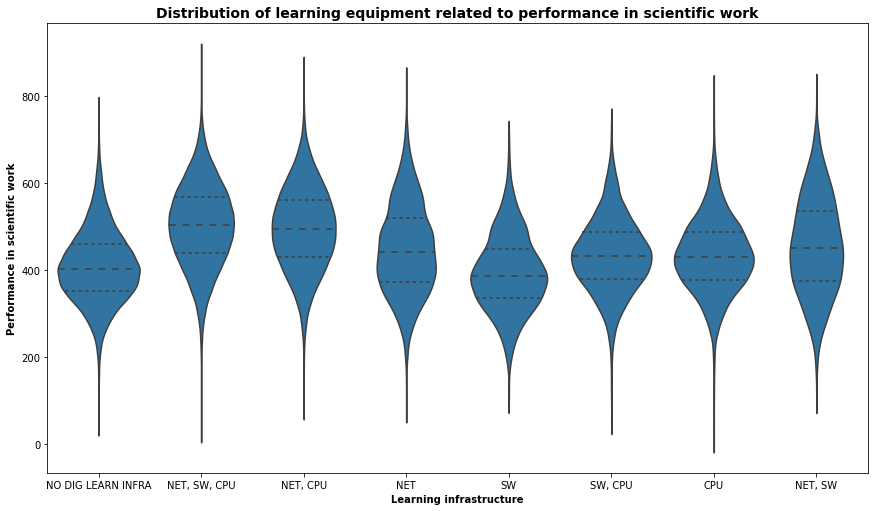

In [11]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Distribution of learning equipment related to performance in scientific work', fontsize = 14, weight = "bold")
sns.violinplot(data = df_master, x = 'dig_learn_infra', y = 'SCIE', color = base_color, inner = 'quartile')
plt.xlabel('Learning infrastructure', fontsize = 10, weight = "bold")
plt.ylabel('Performance in scientific work', fontsize = 10, weight = "bold")
plt.show();

- In general the combination of all three attributes seems to be a positive influence for the performance. 
- As this violinplot shows the complete learning infrastructure has the highest top score and mean in science.

## Boxplots for the relation learn-environmental variables with numerical environmetal variables

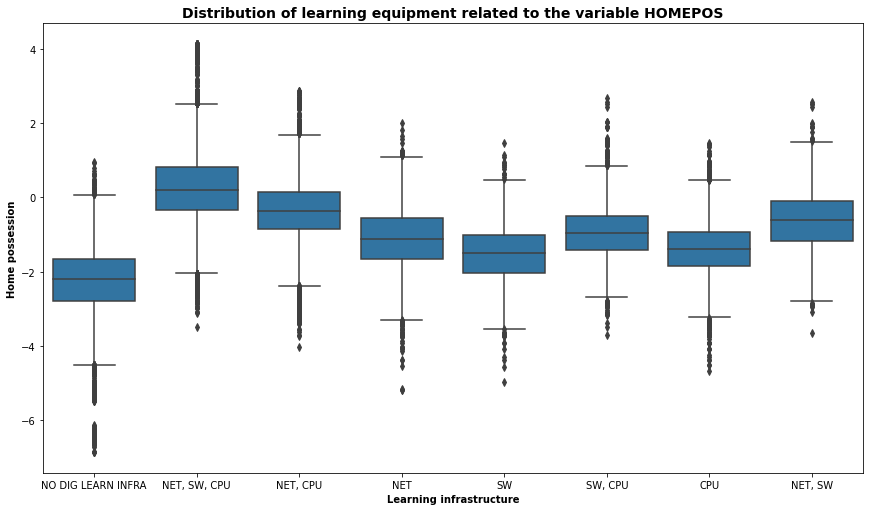

In [12]:
plt.figure(figsize=[14.70, 8.27])
plt.title('Distribution of learning equipment related to the variable HOMEPOS', fontsize = 14, weight = "bold")
sns.boxplot(data = df_master, x = 'dig_learn_infra', y = 'HOMEPOS', color = base_color)
plt.xlabel('Learning infrastructure', fontsize = 10, weight = "bold")
plt.ylabel('Home possession', fontsize = 10, weight = "bold")
plt.show();

- As shown with the violinplots for science the combination of all variables usually has the highest values (top value, mean) on the y axis. 
- The HOMEPOS variable also shows clearer results than WEALTH and PARED, the complete combinations are stronger correlated with HOMEPOS.

## Correlation of the numerical variables

Now I want to calculate the correlations between all numerical columns in df_master.

In [13]:
def cor(df):
    plt.figure(figsize=[14.70, 8.27])
    plt.title('Correlation of the numerical variables', fontsize = 14, weight = "bold")
    g = sns.heatmap(df.corr(), annot = True)
    return plt.show(g);

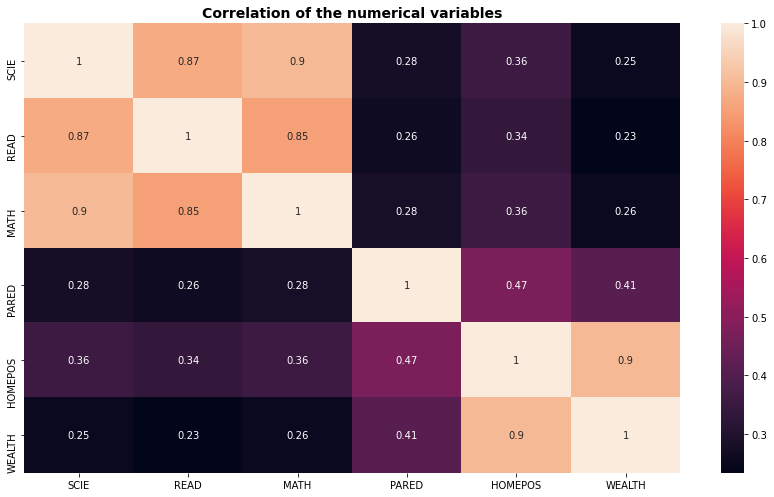

In [14]:
cor(df_master)

- There are high correlations between HOMEPOS and WEALTH, and also all three fields of expertise "MATH", "READ" and "SCIE" are strong correlated. 
- "HOMEPOS" has a stronger correlation to the fields of expertise than "WEALTH" and "PARED". 

In [15]:
READ_gb = df_master.groupby('read_learn_infra').mean()
DIG_gb = df_master.groupby('dig_learn_infra').mean()
GEN_gb = df_master.groupby('learn_infra').mean()
list_infra_gb = [READ_gb,DIG_gb,GEN_gb]

## Top ten and lowest ten countries regarding performance in science and the digital learning infrastructure

In this section the performance score of science is going to be investigated deeper by comparing the top and lowest ten countries. 

In [16]:
#groupby country and selecting top and lowest ten 
count_gb = df_master.groupby('COUNTRY').mean()
dict_count_gb = {}
list_foe = ['SCIE']
for i in list_foe:
    count_gb = count_gb.sort_values(i, axis=0, ascending=False)
    x = 'top_ten_' + i
    y = 'low_ten_' + i
    dict_count_gb[x] = count_gb.head(10)
    dict_count_gb[y] = count_gb.tail(10)

In [17]:
# dictionary to store the df-master data filtered by the top/low ten
dict_master_gb = {}
for key, value in dict_count_gb.items():
    x = value.index
    y = key + '_master'
    dict_master_gb[y] =df_master[df_master.COUNTRY.isin(x)]
    

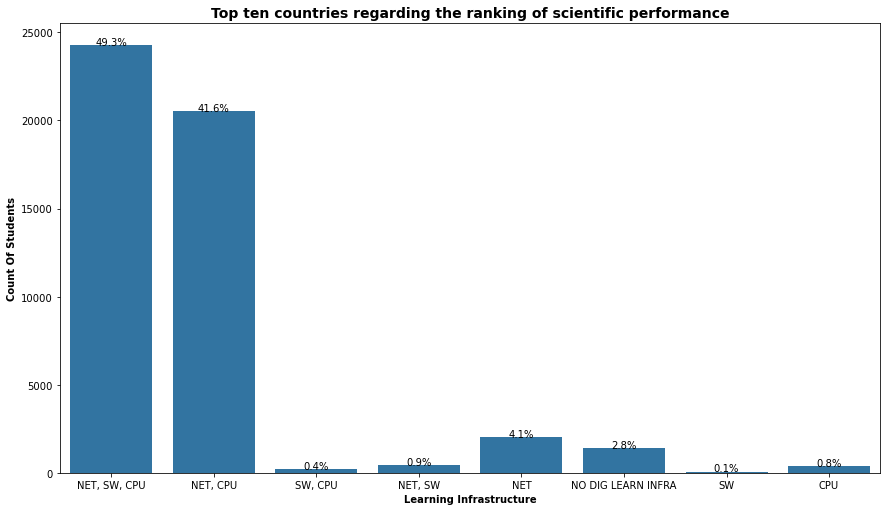

In [18]:
countplot(dict_master_gb.get('top_ten_SCIE_master'),'dig_learn_infra')
plt.title('Top ten countries regarding the ranking of scientific performance', fontsize = 14, weight = "bold")
plt.show();

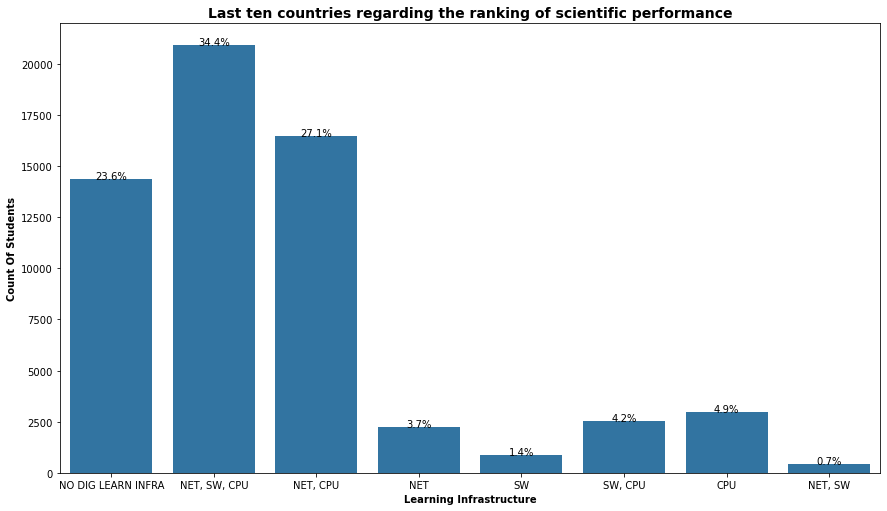

In [19]:
countplot(dict_master_gb.get('low_ten_SCIE_master'),'dig_learn_infra')
plt.title('Last ten countries regarding the ranking of scientific performance', fontsize = 14, weight = "bold")
plt.show();

- The SCIE top ten have 49.3% and are a little bit above the mean. Looking at the low_ten the digital infrastructure for 23.6% is not available, compared to 9,5% of all students and 2,8 of the top_ten. 
- For the reading infrastructure the differences are not so big, but have the same tendency. The low ten for reading have less "NO READ INFRA" (9.6%) than the mean (10.6%).
- Most of the values for complete learning infrastrucutres are higher than the mean. 
- But if you look at the top ten regarding Math and READ 47.8%/46.6% have NET, SW and a CPU, but the mean shows 48.7% with a complete digital learning infrastrucutre. This tells us that learning infrastructure is not the only ingridient for top cognitive performance. 
- The general learning infrastructure has the expected tendencies with relativly small differences.

### Correlations for grouped dataframes for learning infrastructure

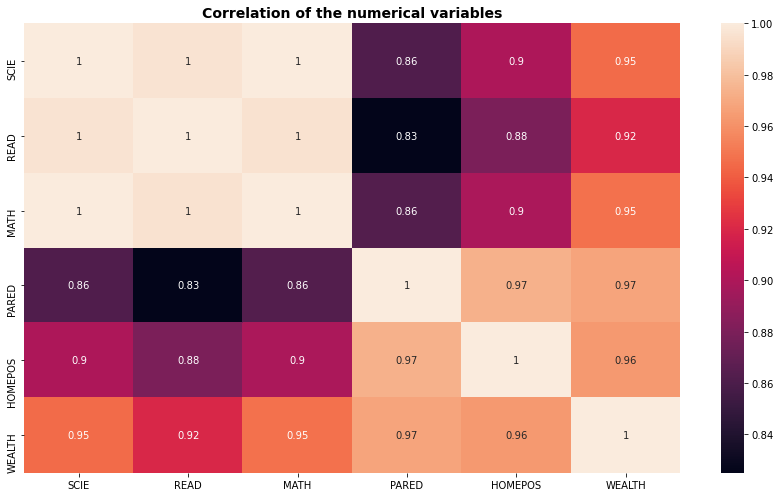

In [20]:
cor(DIG_gb)

- Looking at the correlations within the grouped Dataframes, the values increased and the scale starts now with values of 0,84. 
- The digital infrastructure has the highest correlation to the WEALTH variable in this constellation. 

## Conclusions:

- The influence of the learning infrastructures on cognitive performance was made transparent examining the relation of a digital learning infrastructure and performance in science.
- I also tried to show that these infrastructures also can depend on social and economical variables, like the country you are coming from, the education and economical situation of the parents.
- The comparison of the top and low ten countries tried to make this clearer.
- Grouping the data by the infratructures increased the correlation of the choosen variables.